<img src="../fasp/runner/credits/images/FASPNotebook07.jpg" style="float: right;">


### Query for a specific variant


In [4]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import crdcDRSClient
from fasp.workflow import sbcgcWESClient
from fasp.search import DiscoverySearchClient

faspRunner = FASPRunner(program='FASPNotebook07')
settings = faspRunner.settings

searchClient = DiscoverySearchClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com')
drsClient = crdcDRSClient('~/.keys/crdc_credentials.json','s3')
mysam = sbcgcWESClient(settings['SevenBridgesProject'])	

faspRunner.configure(searchClient, drsClient, mysam)

query = """
SELECT mut.case_barcode subject, meta.file_gdc_id as drs_id, 
meta.file_gdc_url as tumor_bam_file_path,
clin.demo__race, clin.diag__age_at_diagnosis, clin.demo__ethnicity 
FROM search_cloud.cshcodeathon.tcga_somatic_mutation_hg38_gdc_current as mut 
join search_cloud.cshcodeathon.tcga_clinical_gdc_current as clin 
on clin.case_id = mut.case_id 
join search_cloud.cshcodeathon.gdc_case_file_metadata_gdcfileid_to_gcsurl_current as meta 
on meta.file_gdc_id = mut.tumor_bam_uuid 

where mut.Hugo_Symbol = 'JMJD1C'  
order by meta.file_gdc_id 

limit 3"""

faspRunner.runQuery(query, 'JMJD1C query ')

Running query

SELECT mut.case_barcode subject, meta.file_gdc_id as drs_id, 
meta.file_gdc_url as tumor_bam_file_path,
clin.demo__race, clin.diag__age_at_diagnosis, clin.demo__ethnicity 
FROM search_cloud.cshcodeathon.tcga_somatic_mutation_hg38_gdc_current as mut 
join search_cloud.cshcodeathon.tcga_clinical_gdc_current as clin 
on clin.case_id = mut.case_id 
join search_cloud.cshcodeathon.gdc_case_file_metadata_gdcfileid_to_gcsurl_current as meta 
on meta.file_gdc_id = mut.tumor_bam_uuid 

where mut.Hugo_Symbol = 'JMJD1C'  
order by meta.file_gdc_id 

limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________
____Page11_______________
subject=TCGA-02-2466, drsID=00b7d61d-9169-4b17-899e-edc7a5cd7509
workflow submitted, run:2c91e832-7a40-42b5-99d2-79bf4a6645fb
_______

[{'subject': 'TCGA-02-2466', 'run_id': '2c91e832-7a40-42b5-99d2-79bf4a6645fb'},
 {'subject': 'TCGA-02-2466', 'run_id': '264e3cda-1785-4e2e-88d2-d65f85dcbd96'},
 {'subject': 'TCGA-H7-A6C4', 'run_id': '08a48643-77f3-488c-bd6e-e2d0df235128'}]

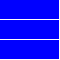

In [2]:
faspRunner.getFASPicon()

In [3]:
mysam.getTaskStatus('f45cdeab-60df-484a-acf5-a3287998f1cc')

'RUNNING'